# Part 1.1 - Optimizing test accuracy as a function of learning rate and maximum iterations

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Importing standard modules
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import lr
import lr_m
import matplotlib.pyplot as plt


In [7]:
# Importing csv data
train = pd.read_csv('diabetes_train.csv')
test = pd.read_csv('diabetes_test.csv')
valid = pd.read_csv('diabetes_val.csv')
all_data = pd.concat([train, test, valid], axis=0)

In [8]:
# Function to find convergent solution of gradient descent as a function of learning-rate and maximum iterations

def optimize(data, max_iter, learning_rate, pred_data):
    """
    Optimize a logisitic regression model's weights using gradient descent.
    This function makes it easier to test different combinations of the
    maximum iterations and learning rate parameters. 
    data:           [pd.DataFrame]  Training or Training+Validation data
    max_iter:       [int]           Maximum Iterations of gradient descent
    learning_rate:  [float]
    pred_data:      [pd.DataFrame]
    returns array of class probabilities
    """
    A = []

    # Input data, features and binary labels column
    Xin = data.drop('Outcome',axis=1).to_numpy()
    Yin = data['Outcome'].to_numpy()
    
    # Prediction data, validation set
    Xp = pred_data.drop('Outcome',axis=1).to_numpy()
    Yp = pred_data['Outcome'].to_numpy().ravel()
    
    # Iterate through the input parameters
    for l in learning_rate:
        
        for m in max_iter:
            
            print(f'LEARNING RATE: {l} \n')
            
            model = lr_m.LogisticRegression(verbose=True, add_bias=True, learning_rate=l, max_iters=m, momentum=0.5)
            yh = model.fit(Xin,Yin).predict(Xp)

            T = []
            T.append(yh)
        
            # Decision Boundary
            prediction = []
            for x in np.array(T).ravel():
                if x < 0.5: prediction.append(0)
                else: prediction.append(1)

            #print(T)
            #print(prediction)
            #print(Yp)
            A.append(accuracy_score(Yp,np.array(prediction).ravel()))
            print("Accuracy Score:", accuracy_score(Yp,np.array(prediction).ravel()))
    
    print(f'Maximum Accuracy achieved: {max(A)}')



In [12]:
# Best set of parameters so far:
m = [1e5, 5e5]
l = [2e-3]

optimize(data=train, max_iter=m, learning_rate=l, pred_data=test)

LEARNING RATE: 0.002 

100000 Iterations
Norm of gradient: 21.39824347380993

Weights: [ 3.06837133e-01  5.45212420e-02 -3.90681156e-02 -5.59554490e-03
  1.01809636e-02  4.69870423e-02  9.20734111e-01 -9.12217481e-03
 -5.61103034e+00]

Accuracy Score: 0.5441176470588235
LEARNING RATE: 0.002 



KeyboardInterrupt: 

In [9]:
# This function determines the accuracy the Sklearn logisitic classifier can achieve

def compareSK(pred_data):
    
    # Input data, features and binary labels column
    Xin = train.drop('Outcome',axis=1).to_numpy()
    Yin = train['Outcome'].to_numpy()
    
    # Prediction data, validation set
    Xp = pred_data.drop('Outcome',axis=1).to_numpy()
    Yp = pred_data['Outcome'].to_numpy().ravel()
    
    model = SGDClassifier(max_iter=1e6, alpha=0.0002)
    yh = model.fit(Xin,Yin).predict(Xp)
    
    T = []
    T.append(yh)
    print(T)
    
    # Decision Boundary
    prediction = []
    for x in np.array(T).ravel():
        if x < 0.5: prediction.append(0)
        else: prediction.append(1)
            
    print(Yp)
    
    print("Accuracy Score:", accuracy_score(Yp,np.array(prediction).ravel()))

In [6]:
compareSK(pred_data=test)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])]
[0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1]
Accuracy Score: 0.6911764705882353


## Results & Remarks

* Our base model preformed better than the Sklearn SGD logisitic classifier with a margin greater than 10%

* Decision Boundary is set at X=0.5: $$P(y=1|X) < 0.5 \rightarrow \hat{y}=0$$ $$P(y=1|X) \geq 0.5 \rightarrow \hat{y}= 1$$ 


* Best accuracy achieved on the test set was 77.9% with $\alpha = 2 * 10^{-4}$ and $i_{max} = 1 * 10^6$

* Output (including weights and magnitude of gradient vector):

```
                    LEARNING RATE: 2e-4
                    
                    1000000 Iterations
                    Norm of gradient: 0.013429351710347736

                    Weights: [ 1.29152029e-01  2.50264215e-02 -1.86834650e-02 -2.52562870e-03
                      4.12691159e-04  4.13164885e-02  5.23867127e-01  6.70382786e-04
                     -4.46242101e+00]

                    Accuracy Score: 0.7794117647058824
                    
                    -----------------------------------------------------------------------------
                    
                    LEARNING RATE: 9e-05 

                    5000000 Iterations
                    Norm of gradient: 0.005435090157130823

                    Weights: [ 1.36309194e-01  3.11128368e-02 -1.48346749e-02 -3.04513818e-03
                     -8.58120779e-05  6.64128026e-02  7.09122848e-01  6.22651319e-03
                     -6.61628338e+00]

                    Accuracy Score: 0.7794117647058824
```

# Part 1.2 - Implementing mini-batch stochastic gradient descent

- Mini-batch gradient descent relies on splitting the training data into batches and running the gradient descent algorithm on each set of data

In [10]:
def BatchData(data: pd.DataFrame, size: int, b=0, with_num=False, split=False):
    """
    Splits the data into specific batches. Allows user to batch by features and labels
    or batch the entire dataset. Also, allows the user to have a certain number of batches
    and not batch the entire data set.
    
    data:     [pd.DataFrame]  This is the training data as input
    size:     [int]           Size of batches in units of data points
    b:        [int]           Indicates how many batches of the data will be returned
    with_num: [bool]          Lets user decide how many batches it should generate
    
    returns batched data
    """
    if split:
        # Split the data into features and labels
        X = data.drop('Outcome', axis=1)
        Y = data['Outcome']

        # Iterate through data and split it based on batch size and number of batches needed
        # Function can handle iterating through the entire dataset or for certain number of batches
        if with_num:
            for x in range(0, b*size, size):
                yield X[x : min(x + size, b*size)], Y[x : min(x + size, b*size)]

        else:      
            for x in range(0, len(data), size):
                yield X[x : min(x + size, len(data))], Y[x : min(x + size, len(data))]
                           
    else:
        if with_num:
            for x in range(0, b*size, size):
                yield data[x : min(x + size, b*size)]

        else:      
            for x in range(0, len(data), size):
                yield data[x : min(x + size, len(data))]

In [ ]:
# Test batching for entire data set
for x in BatchData(train, 2):
    print(f'{x}\n\n')

In [10]:
# Test batching for discrete batches
for batch in BatchData(train, 32,split=False):
    print(f'{batch}\n\n')

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             5      144             82             26      285  32.0   
1             0      128             68             19      180  30.5   
2             9      156             86             28      155  34.3   
3             1      144             82             46      180  46.1   
4             0      179             90             27        0  44.1   
5             1      136             74             50      204  37.4   
6            13      104             72              0        0  31.2   
7             2      125             60             20      140  33.8   
8             1       95             82             25      180  35.0   
9             4      184             78             39      277  37.0   
10            7      103             66             32        0  39.1   
11            8      155             62             26      495  34.0   
12            2      122             60            

In [11]:
def miniBatchGD(data, BatchSize, epochs=1, All_data=True, NumBatches=0):
    """
    Run gradient descent optimization in mini-batches
    
    data:       [pd.DataFrame]  Input data
    BatchSize:  [int]           Size of mini-batch
    epoch:      [int]           Number of iterations over the batches
    NumBatches: [int]           How many batches it should generate
    All_data:   [bool]          If the user wants to batch the entire dataset
    
    returns weights and accuracy on testing set with mini-batch
    
    """
    if All_data:
        for epoch in range(1, epochs+1):
            print(f'Epoch: {epoch}')
            for batch in BatchData(data, BatchSize, split=False):
                optimize(data=batch, max_iter=[1e6], learning_rate=[2e-4], pred_data=test)
            
        

In [15]:
for i in [16,32,64,128]:
    print("---------------------------------------------------------------------------")
    print("MiniBatch with size : " + str(i) + "\n")
    miniBatchGD(data=train, BatchSize=i)

---------------------------------------------------------------------------
MiniBatch with size : 16

Epoch: 1
LEARNING RATE: 0.0002 

1000000 Iterations
Norm of gradient: 0.016253400051043854

Weights: [ 1.42960137e-01 -7.33673501e-04  2.74797931e-02 -2.96772622e-02
  5.58025790e-03  7.88631199e-02  1.45479715e+00 -3.35959116e-02
 -3.75835272e+00]

Accuracy Score: 0.5
Maximum Accuracy achieved: 0.5
LEARNING RATE: 0.0002 

1000000 Iterations
Norm of gradient: 0.016346778246859543

Weights: [ 3.14337447  0.06328996 -1.10392766 -0.05830919  0.04204658  1.13128452
  5.28391114  0.34835794 -0.99841094]

Accuracy Score: 0.6764705882352942
Maximum Accuracy achieved: 0.6764705882352942
LEARNING RATE: 0.0002 

1000000 Iterations
Norm of gradient: 0.0007881832751728484

Weights: [ 0.03401319  0.3386535  -0.29816984  0.27637557  0.03007795 -0.7428101
 -0.02523911 -0.74066625 -0.03805847]

Accuracy Score: 0.7205882352941176
Maximum Accuracy achieved: 0.7205882352941176
LEARNING RATE: 0.0002 

100

1000000 Iterations
Norm of gradient: 0.0007182093113280596

Weights: [-8.96889761e-05  4.53518786e-02 -1.09920599e-01 -1.79759936e-03
  4.83372021e-02 -1.04118152e+00 -1.29270660e-02  4.62470780e-01
 -3.66272232e-02]

Accuracy Score: 0.6911764705882353
Maximum Accuracy achieved: 0.6911764705882353
LEARNING RATE: 0.0002 

1000000 Iterations
Norm of gradient: 0.012962911118480495

Weights: [ 4.43554082  0.25203775 -0.53975457  0.81174995 -0.04511467 -0.2034991
  3.1550821  -0.42100923 -0.64690871]

Accuracy Score: 0.6470588235294118
Maximum Accuracy achieved: 0.6470588235294118
LEARNING RATE: 0.0002 

1000000 Iterations
Norm of gradient: 0.017266908728428974

Weights: [-1.98175308e+00  9.85029375e-02 -1.18237154e+00 -4.88201200e-02
  2.79259588e-03  1.08780744e+00 -3.50509917e+00  1.65943932e+00
 -2.20597734e+00]

Accuracy Score: 0.5588235294117647
Maximum Accuracy achieved: 0.5588235294117647
LEARNING RATE: 0.0002 

1000000 Iterations
Norm of gradient: 0.014104565983959235

Weights: [ 0

1000000 Iterations
Norm of gradient: 0.01870912703412405

Weights: [ 3.40391125e-01  2.43649699e-02 -7.03599231e-03 -2.96701015e-03
 -1.25218240e-03 -3.09377004e-02  1.04176797e+00  8.21732492e-03
 -4.45602744e+00]

Accuracy Score: 0.7352941176470589
Maximum Accuracy achieved: 0.7352941176470589
LEARNING RATE: 0.0002 

1000000 Iterations
Norm of gradient: 0.011581791287680086

Weights: [ 0.57116198  0.05813573 -0.04393463 -0.16919432  0.03345322 -0.11386087
 -1.97193667  0.05669011 -2.54794351]

Accuracy Score: 0.6029411764705882
Maximum Accuracy achieved: 0.6029411764705882
---------------------------------------------------------------------------
MiniBatch with size : 64

Epoch: 1
LEARNING RATE: 0.0002 

1000000 Iterations
Norm of gradient: 0.014466886588467138

Weights: [ 1.24577431e-01  1.31130487e-02 -3.05705116e-02 -1.51127842e-02
  3.14964719e-03  1.00424260e-01  8.43848929e-01  5.31012459e-03
 -4.34548660e+00]

Accuracy Score: 0.7647058823529411
Maximum Accuracy achieved: 0.76

For Size of 16, the best runs were:
        1000000 Iterations
        Norm of gradient: 0.021914519459073568

        Weights: [-4.27615340e-02  1.14583572e-01 -2.74199590e-01 -6.62422477e-02
         -4.56386852e-03  3.15826170e-01  1.85011457e+00 -2.38960959e-02
         -5.42582340e+00]

        Accuracy Score: 0.75
        Maximum Accuracy achieved: 0.75
        LEARNING RATE: 0.0002 
    AND 
        1000000 Iterations
        Norm of gradient: 0.01790161371305113

        Weights: [ 2.43273138e-02  1.16554364e-02  1.46753457e-02 -3.15637406e-02
          2.27281769e-03 -5.65929682e-02  3.13558620e+00  2.51635411e-02
         -3.75992853e+00]

        Accuracy Score: 0.75
        Maximum Accuracy achieved: 0.75
        LEARNING RATE: 0.0002 
For Size of 32, the best run was:
    1000000 Iterations
    Norm of gradient: 0.014539538983843484

    Weights: [ 2.91041574e-01  6.49236039e-02 -5.82671616e-02 -1.66639663e-02
     -9.13939482e-04  7.37808914e-02  6.70334018e-01 -1.23143478e-01
     -3.59744403e+00]

    Accuracy Score: 0.7794117647058824
    Maximum Accuracy achieved: 0.7794117647058824
    LEARNING RATE: 0.0002 
    
For Size of 64 the best run was:
    1000000 Iterations
    Norm of gradient: 0.01342623920977199

    Weights: [ 1.82700095e-01  3.64747381e-02 -1.69485010e-02  1.17249948e-02
     -2.59015739e-03  5.27160834e-02 -1.48884063e+00 -5.03520251e-02
     -4.14590954e+00]

    Accuracy Score: 0.8088235294117647
    Maximum Accuracy achieved: 0.8088235294117647
    LEARNING RATE: 0.0002 

For the size of 128 the best run was:

     1000000 Iterations
    Norm of gradient: 0.015208011552875494

    Weights: [ 4.97694058e-02  2.30010736e-02 -5.15428911e-03  6.25145234e-03
      3.93256013e-04  1.94859266e-02  1.82586172e-01  1.26061411e-02
     -4.67090529e+00]

    Accuracy Score: 0.7794117647058824
    Maximum Accuracy achieved: 0.7794117647058824

We will now graph the following results:

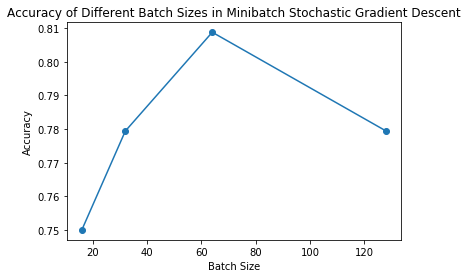

In [21]:
sizes = [16,32,64,128]
accuracy = [0.75, 0.7794117647058824, 0.8088235294117647, 0.7794117647058824]
plt.plot(sizes,accuracy, marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Batch Sizes in Minibatch Stochastic Gradient Descent")
plt.show()

# Part 1.3: Momentum Gradient Descent

In [42]:
# Function to find convergent solution of gradient descent as a function of learning-rate and maximum iterations

def optimize_Momentum(data, max_iter, learning_rate, pred_data, momentum):
    """
    Optimize a logisitic regression model's weights using Momentum gradient descent.
    This function makes it easier to test different combinations of the
    maximum iterations and learning rate parameters. 
    data:           [pd.DataFrame]  Training or Training+Validation data
    max_iter:       [int]           Maximum Iterations of gradient descent
    learning_rate:  [float]
    pred_data:      [pd.DataFrame]
    momentum:       [int]
    returns array of class probabilities
    """
    A = []

    # Input data, features and binary labels column
    Xin = data.drop('Outcome',axis=1).to_numpy()
    Yin = data['Outcome'].to_numpy()
    
    # Prediction data, validation set
    Xp = pred_data.drop('Outcome',axis=1).to_numpy()
    Yp = pred_data['Outcome'].to_numpy().ravel()
    
    # Iterate through the input parameters
    for l in learning_rate:
        
        for z in max_iter:
            
            print(f'LEARNING RATE: {l} \n')
            
            model = lr_m.LogisticRegression(verbose=True, add_bias=True, learning_rate=l, max_iters=z, momentum=momentum)
            yh = model.fit(Xin,Yin).predict(Xp)

            T = []
            T.append(yh)
        
            # Decision Boundary
            prediction = []
            for x in np.array(T).ravel():
                if x < 0.5: prediction.append(0)
                else: prediction.append(1)

            #print(T)
            #print(prediction)
            #print(Yp)
            A.append(accuracy_score(Yp,np.array(prediction).ravel()))
            print("Accuracy Score:", accuracy_score(Yp,np.array(prediction).ravel()))
    
    print(f'Maximum Accuracy achieved: {max(A)}')



In [48]:
# Best set of parameters so far:
m = [1e5, 5e5]
l = [2e-3]

for i in [0,0.2,0.4,0.6,0.8,1]:
    print("For Momentum value of : " + str(i))
    print("-----------------------------------------------------------------------------------")
    optimize_Momentum(data=train, max_iter=m, learning_rate=l, pred_data=test, momentum = i)

For Momentum value of : 0
-----------------------------------------------------------------------------------
LEARNING RATE: 0.002 

100000 Iterations
Norm of gradient: 66.40115700696207

Weights: [ 1.18689104  0.14537287 -0.17087502 -0.04066871  0.06244062  0.0336425
  1.06576802 -0.07810965 -6.50965016]

Accuracy Score: 0.5
LEARNING RATE: 0.002 

500000 Iterations
Norm of gradient: 63.54810635375472

Weights: [  1.20202912   0.2250548   -0.1204609   -0.0405338    0.06310438
   0.17154895   4.01929381  -0.02652355 -26.43081133]

Accuracy Score: 0.5588235294117647
Maximum Accuracy achieved: 0.5588235294117647
For Momentum value of : 0.2
-----------------------------------------------------------------------------------
LEARNING RATE: 0.002 

100000 Iterations
Norm of gradient: 40.18899093750616

Weights: [ 0.57362987  0.11203793 -0.07905057 -0.01270575  0.03993064  0.05192
  1.07152807 -0.01656012 -6.00382174]

Accuracy Score: 0.29411764705882354
LEARNING RATE: 0.002 

500000 Iteration

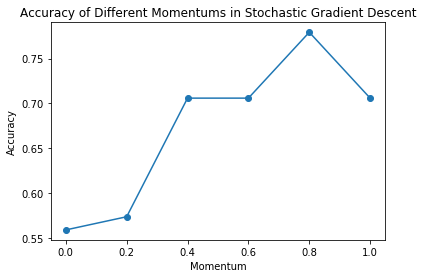

In [49]:
mom = [0,0.2,0.4,0.6,0.8,1]
accuracy = [0.5588235294117647, 0.5735294117647058, 0.7058823529411765, 0.7058823529411765, 0.7794117647058824, 0.7058823529411765 ]
plt.plot(mom,accuracy, marker='o')
plt.xlabel("Momentum")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Momentums in Stochastic Gradient Descent")
plt.show()